In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

tf.test.is_built_with_cuda()
tf.config.list_physical_devices('GPU') 

2021-12-17 04:50:05.540712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

time: 1.11 s (started: 2021-12-17 04:50:04 +00:00)


2021-12-17 04:50:05.541169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.544807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.545236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.545657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.546079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2021-12-17 04:50:05.583617: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


True

time: 699 ms (started: 2021-12-17 04:50:05 +00:00)


2021-12-17 04:50:05.752516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.753016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.753430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.753835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:05.754233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

# 1.  Please use a neural net to find the decision boundary based on ‘train.mat.” 

In [3]:
import tensorflow as tf
import numpy as np
import scipy.io 
from sklearn.preprocessing import StandardScaler
train = scipy.io.loadmat('train.mat') 
train_x = np.concatenate((train['x1'],train['x2']), axis=1)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
train_y = train['y']
test = scipy.io.loadmat('test.mat') 
test_x = np.concatenate((test['x1'],test['x2']), axis=1)
test_x = scaler.transform(test_x)
test_y = test['y']

class DNN(tf.keras.Model):
  def __init__(self):
    super(DNN,self).__init__()
    self.dense1 = tf.keras.layers.Dense(3, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(2, activation=tf.nn.relu)
    self.output_layer = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.output_layer(x)


batch_size = 10
epochs = 1000
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = DNN()
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=0)
model.summary()

2021-12-17 04:50:06.430659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:06.431118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:06.431527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:06.431929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 04:50:06.432324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  9         
                                                                 
 dense_1 (Dense)             multiple                  8         
                                                                 
 dense_2 (Dense)             multiple                  3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
time: 6.46 s (started: 2021-12-17 04:50:06 +00:00)


In [4]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print(f"Test accuracy: {score[1]}, error rate:{1-score[1]}")

Test loss: 0.6931471228599548
Test accuracy: 0.5, error rate:0.5
time: 95 ms (started: 2021-12-17 04:50:12 +00:00)


# 2. Please design a neural net to predict network intrusion types for the datasets “train_DefenseSystem.csv” and “test_DefenseSystem.csv.”

## Preprocessing 

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train_DefenseSystem.csv', parse_dates=['event_time'], infer_datetime_format=True)
test_data = pd.read_csv('test_DefenseSystem.csv', parse_dates=['event_time'], infer_datetime_format=True) # test_data has no lable

lenc = LabelEncoder()
train_y = lenc.fit_transform(train_data['event_rule_category'])
train_y = train_y.reshape(-1,1)
pre_train_x = train_data.drop(['event_rule_category'], axis = 1)
pre_test_x = test_data
display(pre_train_x.shape, pre_test_x.shape)
display(pre_train_x.head())
display(pre_train_x.info())
display(pre_train_x.describe())
display(np.unique(train_y), lenc.classes_, train_y.shape)

(5000, 17)

(1020, 17)

,device_dev_name,device_family_name,device_hashed_mac,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,event_time,router_ip
0,Windows XP,Computer,a01f58b5c4fdb3122d6797ada0a3ee71fbe134dd,Windows XP,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.243,2016-12-15 03:57:00,161.139.40.242
1,Windows,Computer,7c16de1f49ef32f5354a33ccd2ec5d0d5ef9e100,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1130593,WEB Microsoft IIS HTTP.sys Remote Code Executi...,CVE-2015-1635; MS15-034,5,192.168.1.133,2016-12-11 06:54:00,199.221.3.43
2,Windows 8/10,Computer,6f8cdf9d553e2e1cba4c3b0ad226e6c7df119005,Windows 8/10,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1056078,WEB Hashtable Collisions,CVE-2011-3414; CVE-2011-5034; CVE-2011-5035; C...,5,192.168.1.100,2016-12-24 01:20:00,157.2.60.102
3,Windows,Computer,4ac93ab7639e8800779afd887d6df7a93deb5c62,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.6,2016-12-31 07:22:00,51.20.54.170
4,Windows,Computer,02de4773b0099f5b0a873516d76a888c3f4c6508,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.44,2016-12-19 12:22:00,116.95.157.235


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   device_dev_name                 5000 non-null   object        
 1   device_family_name              5000 non-null   object        
 2   device_hashed_mac               5000 non-null   object        
 3   device_os_name                  5000 non-null   object        
 4   device_type_name                5000 non-null   object        
 5   device_vendor_name              5000 non-null   object        
 6   event_protocol_id               5000 non-null   int64         
 7   event_flow_outbound_or_inbound  5000 non-null   object        
 8   event_role_device_or_router     5000 non-null   object        
 9   event_role_server_or_client     5000 non-null   object        
 10  event_rule_id                   5000 non-null   int64         
 11  even

None

,event_protocol_id,event_rule_id,event_rule_severity
count,5000.000000,5.000000e+03,5000.000000
mean,6.410200,1.080985e+06,4.363600
std,2.089308,3.626082e+04,0.481083
min,0.000000,1.049802e+06,4.000000
25%,6.000000,1.050015e+06,4.000000
50%,6.000000,1.057007e+06,4.000000
75%,6.000000,1.130593e+06,5.000000
max,17.000000,1.132896e+06,5.000000


array([0, 1])

array(['Access Control', 'Web Attack'], dtype=object)

(5000, 1)

time: 53.4 ms (started: 2021-12-17 04:50:12 +00:00)


In [6]:
a_pre_data = pd.concat([pre_train_x,pre_test_x], axis=0)
a_pre_data = a_pre_data.drop(['device_hashed_mac'], axis=1)
for k in pre_train_x.keys().drop(['device_hashed_mac']):
    if k == 'event_self_ipv4': 
        tmp = a_pre_data['event_self_ipv4'].str.extract(r'(.*?)\.(.*?)\.(.*?)\.(.*)')
        a_pre_data['self_ip_class_A'] = (tmp[0]=='10').astype(int)
        a_pre_data['self_ip_class_B'] = (tmp[0]=='172').astype(int)
        a_pre_data['self_ip_class_B'] = (tmp[0]=='192').astype(int)
        a_pre_data['self_ip_others'] = ((tmp[0] != '192') * (tmp[0] != '172') * (tmp[0] != '10') == True).astype(int) # ip not start with 10, 172,192 => convert to 1
        a_pre_data = a_pre_data.drop(['event_self_ipv4'], axis=1)
    elif k == 'router_ip':
        tmp = a_pre_data['router_ip'].str.extract(r'(.*?)\.(.*?)\.(.*?)\.(.*)')
        tmp[tmp[0].isnull()] = -1
        a_pre_data['router_ip_class_A'] = (np.logical_and((0<=tmp[0].astype(int)), (tmp[0].astype(int)<128))).astype(int)
        a_pre_data['router_ip_class_B'] = (np.logical_and((128<=tmp[0].astype(int)), (tmp[0].astype(int)<192))).astype(int)
        a_pre_data['router_ip_class_C'] = (np.logical_and((192<=tmp[0].astype(int)), (tmp[0].astype(int)<224))).astype(int)
        a_pre_data['router_ip_class_D'] = (np.logical_and((224<=tmp[0].astype(int)), (tmp[0].astype(int)<240))).astype(int)
        a_pre_data['router_ip_class_E'] = (np.logical_and((240<=tmp[0].astype(int)), (tmp[0].astype(int)<255))).astype(int)
        a_pre_data['router_ip_others'] = (tmp[0].astype(int) == -1).astype(int)
        a_pre_data = a_pre_data.drop(['router_ip'], axis=1)
    elif k == 'event_time':
        tmp = a_pre_data['event_time'].apply(lambda x : x.timestamp())
        a_pre_data['event_time'] = tmp 
    else:
        a_pre_data_one_hot =  pd.get_dummies(a_pre_data[k])
        a_pre_data = pd.concat([a_pre_data, a_pre_data_one_hot],axis=1)
        a_pre_data = a_pre_data.drop([k], axis=1)

train_x = a_pre_data[:len(pre_train_x)]
test_x = a_pre_data[len(pre_train_x):]
display(train_x.head())
display(train_x.info())
display(train_x.describe())
print(train_x.shape, test_x.shape)

,event_time,ASUS RT Router,Amazon Kindle,Android 3.0-4.1,Android 4.2-5.1,Android 6.0,Apple Watch/iPad Pro,Axis Network Camera,Belkin F5D8235-4 v2,BlackBerry,...,5,self_ip_class_A,self_ip_class_B,self_ip_others,router_ip_class_A,router_ip_class_B,router_ip_class_C,router_ip_class_D,router_ip_class_E,router_ip_others
0,1.481774e+09,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1.481439e+09,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1.482542e+09,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,1.483169e+09,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1.482150e+09,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 292 entries, event_time to router_ip_others
dtypes: float64(1), int64(9), uint8(282)
memory usage: 1.8 MB


None

,event_time,ASUS RT Router,Amazon Kindle,Android 3.0-4.1,Android 4.2-5.1,Android 6.0,Apple Watch/iPad Pro,Axis Network Camera,Belkin F5D8235-4 v2,BlackBerry,...,5,self_ip_class_A,self_ip_class_B,self_ip_others,router_ip_class_A,router_ip_class_B,router_ip_class_C,router_ip_class_D,router_ip_class_E,router_ip_others
count,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.481885e+09,0.000800,0.00060,0.000800,0.060600,0.010800,0.003400,0.000400,0.000800,0.002000,...,0.363600,0.038400,0.926600,0.025000,0.279000,0.495200,0.174600,0.012400,0.011000,0.027800
std,7.754209e+05,0.028276,0.02449,0.028276,0.238619,0.103371,0.058216,0.019998,0.028276,0.044681,...,0.481083,0.192179,0.260818,0.156141,0.448552,0.500027,0.379663,0.110674,0.104313,0.164416
min,1.480551e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.481210e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.481853e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.482570e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.483229e+09,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(5000, 292) (1020, 292)
time: 422 ms (started: 2021-12-17 04:50:12 +00:00)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x.values)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y)
test_x = scaler.transform(test_x.values)

time: 19.8 ms (started: 2021-12-17 04:50:13 +00:00)


## 2.1.(30%) Randomly select 80% of the training set as your training set and the rest 20% as your validation set. Use the validation set to design your network structure and choose possible hyper-parameters

In [8]:
class DNN_base(tf.keras.Model):

  def __init__(self, n_units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(n_units, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(n_units, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(n_units, activation=tf.nn.relu)
    self.dense4 = tf.keras.layers.Dense(n_units, activation=tf.nn.relu)
    self.dense5 = tf.keras.layers.Dense(n_units, activation=tf.nn.relu)
    self.output_layer = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.dense4(x)
    x = self.dense5(x)
    return self.output_layer(x)


batch_size = 100
epochs = 30
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
for n_units in [2, 10, 20]:
    def_sys_model = DNN_base(n_units)
    def_sys_model._name = f'dnn_base_{n_units}-units'
    def_sys_model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    def_sys_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
    def_sys_model.summary()
    def_sys_model.save(f'./dnn_width{n_units}', save_format='tf')
    score = def_sys_model.evaluate(valid_x, valid_y, verbose=0)
    print(f"When DNN width = {n_units}, Validation loss:{score[0]}, Validation accuracy:{score[1]}\n\n")

Model: "dnn_base_2-units"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  586       
                                                                 
 dense_4 (Dense)             multiple                  6         
                                                                 
 dense_5 (Dense)             multiple                  6         
                                                                 
 dense_6 (Dense)             multiple                  6         
                                                                 
 dense_7 (Dense)             multiple                  6         
                                                                 
 dense_8 (Dense)             multiple                  3         
                                                                 
Total params: 613
Trainable params: 613
Non-traina

2021-12-17 04:50:15.499727: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./dnn_width2/assets
When DNN width = 2, Validation loss:0.6779824495315552, Validation accuracy:0.5655999779701233


Model: "dnn_base_10-units"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  2930      
                                                                 
 dense_10 (Dense)            multiple                  110       
                                                                 
 dense_11 (Dense)            multiple                  110       
                                                                 
 dense_12 (Dense)            multiple                  110       
                                                                 
 dense_13 (Dense)            multiple                  110       
                                                                 
 dense_14 (Dense)            

## 2.2.(15%) Use your best network (out of 3 at least) to predict the intrusion type for the test set. Please report your results.

#### Choose model dnn_base_20-units to predict test data 

In [9]:
import pandas as pd

load_model = tf.keras.models.load_model('./dnn_width20')
pred = load_model.predict(test_x)
pred = np.where(pred<0.5, 0, 1)
pred_str = lenc.inverse_transform(pred)
print(f'predition of test data: {pred_str}')
pd.DataFrame(pred_str, columns=['prediction']).to_csv('q2.csv')

predition of test data: ['Access Control' 'Web Attack' 'Web Attack' ... 'Access Control'
 'Web Attack' 'Web Attack']
time: 247 ms (started: 2021-12-17 04:50:20 +00:00)


## 3.1 (10%) You are asked to construct a classification model based on convolutional neural networks for digit recognition. Please report the prediction accuracy for the testing set.

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_y = to_categorical(train_y) 
test_y = to_categorical(test_y)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')/255
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')/255

class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.cnn1 = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), input_shape=(28,28,1), activation='relu')
        self.cnn2 = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), activation='relu')
        self.Flatten1= tf.keras.layers.Flatten()
        self.outputs = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self,inputs):
        x = self.cnn1(inputs)
        x = self.cnn2(x)
        x = self.Flatten1(x)
        return self.outputs(x)

    

batch_size = 100
epochs = 30
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn_model = CNN()
cnn_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
cnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
cnn_model.summary()

2021-12-17 04:50:21.455520: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  50        
                                                                 
 conv2d_1 (Conv2D)           multiple                  230       
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_21 (Dense)            multiple                  28810     
                                                                 
Total params: 29,090
Trainable params: 29,090
Non-trainable params: 0
_________________________________________________________________
time: 20.6 s (started: 2021-12-17 04:50:20 +00:00)


In [11]:
score = cnn_model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08248109370470047
Test accuracy: 0.9750999808311462
time: 448 ms (started: 2021-12-17 04:50:41 +00:00)


## 3.2 (30%) Please add 10%, 20%, 30% of salt-and-pepper noise to the test images, and test them using the model you trained on clean images from 3.1. Report the prediction accuracies. Compare your results with those from 3.1. What do you find?

In [12]:
import random
import numpy as np

def gen_noise_pics(img, noise_lv):
    img_size = 28**2
    new_img = np.empty((len(img), 28, 28, 1))
    for i in range(len(img)):
        ran_seq = random.sample([n for n in range(img_size)], np.int(img_size*noise_lv))
        x = img[i].copy().reshape(-1, img_size)
        x[0, ran_seq]=1
        new_img[i,:] = x.reshape(-1, 28, 28, 1)
    return new_img

test_x_n01 = gen_noise_pics(test_x, 0.1)
test_x_n02 = gen_noise_pics(test_x, 0.2)
test_x_n03 = gen_noise_pics(test_x, 0.3)
score_list = []
score_list.append(cnn_model.evaluate(test_x_n01, test_y, verbose=0))
score_list.append(cnn_model.evaluate(test_x_n02, test_y, verbose=0))
score_list.append(cnn_model.evaluate(test_x_n03, test_y, verbose=0))
for i,score in enumerate(score_list) : print(f"Noise level {i} Test loss: {score[0]}, Test accuracy: {score[1]}")

Noise level 0 Test loss: 1.471121907234192, Test accuracy: 0.5943999886512756
Noise level 1 Test loss: 5.825091361999512, Test accuracy: 0.2605000138282776
Noise level 2 Test loss: 10.472006797790527, Test accuracy: 0.17919999361038208
time: 3.68 s (started: 2021-12-17 04:50:41 +00:00)


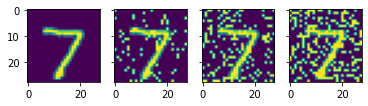

time: 633 ms (started: 2021-12-17 04:50:45 +00:00)


In [13]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1, 4, sharey=True)
ax[0].imshow(test_x[0])
ax[1].imshow(test_x_n01[0])
ax[2].imshow(test_x_n02[0])
ax[3].imshow(test_x_n03[0])

## 3.3 (20%) Please use VGG-16 as a backbone pre-trained on ImageNet to fine-tune your model for the classification and redo Q. 3.1 and Q. 3.2.

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16 

# 凍結網路層數
freeze_layer = 17
vgg_net = VGG16(include_top=False, weights='imagenet', input_tensor=None)

for i, layer in enumerate(vgg_net.layers):
    if i < freeze_layer: 
        layer.trainable = False
    else:
        layer.trainable = True
        
print([l.trainable for l in vgg_net.layers])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]
time: 164 ms (started: 2021-12-17 04:50:46 +00:00)


In [15]:
from tensorflow.image import resize

ext_vgg_net = tf.keras.models.Model(inputs=vgg_net.input, outputs=vgg_net.get_layer('block2_conv2').output, name="ext_vgg")

class CNN_transfer(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.init_layer = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=2, strides=2, activation='relu')
        self.vgg_net = ext_vgg_net
        self.conv1 = tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=3, kernel_size=3, activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=2, activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=2, activation='relu')
        self.deconv1 = tf.keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=1, activation='relu')
        self.deconv2 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=3, strides=1, activation='relu')
        self.deconv3 = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=2, strides=2, activation='relu')
        self.Flatten1= tf.keras.layers.Flatten()
        self.outputs = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self,inputs):
        l1_out = self.init_layer(inputs)
        vgg_out = self.vgg_net(l1_out)
        conv1_out = self.conv1(vgg_out)
        conv2_out = self.conv2(conv1_out)
        deconv1_out = self.deconv1(conv2_out)
        skip_con1 =  deconv1_out+conv1_out           # ref: U-Net
        deconv2_out = self.deconv2(skip_con1)
        skip_con2 = deconv2_out+vgg_out
        deconv3_out = self.deconv3(skip_con2)
        skip_con3 = deconv3_out+l1_out
        conv3_out = self.conv3(skip_con3)
        conv4_out = self.conv4(conv3_out)
        x = self.Flatten1(conv4_out)
        return self.outputs(x)
    
batch_size = 1000
epochs = 30
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_tf_model = CNN_transfer()
cnn_tf_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
cnn_tf_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
cnn_tf_model.summary()

Model: "cnn_transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  multiple                 15        
 nspose)                                                         
                                                                 
 ext_vgg (Functional)        (None, None, None, 128)   260160    
                                                                 
 conv2d_2 (Conv2D)           multiple                  5765      
                                                                 
 conv2d_3 (Conv2D)           multiple                  138       
                                                                 
 conv2d_4 (Conv2D)           multiple                  84        
                                                                 
 conv2d_5 (Conv2D)           multiple                  28        
                                                      

In [16]:
score = cnn_tf_model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06952483206987381
Test accuracy: 0.978600025177002
time: 1.33 s (started: 2021-12-17 04:55:01 +00:00)


In [17]:
tf_score_list = []
tf_score_list.append(cnn_tf_model.evaluate(test_x_n01, test_y, verbose=0))
tf_score_list.append(cnn_tf_model.evaluate(test_x_n02, test_y, verbose=0))
tf_score_list.append(cnn_tf_model.evaluate(test_x_n03, test_y, verbose=0))
for i,score in enumerate(tf_score_list) : print(f"Noise level {i} Test loss: {score[0]}, Test accuracy: {score[1]}")

Noise level 0 Test loss: 1.7064546346664429, Test accuracy: 0.6207000017166138
Noise level 1 Test loss: 3.6914596557617188, Test accuracy: 0.4077000021934509
Noise level 2 Test loss: 5.798006534576416, Test accuracy: 0.2851000130176544
time: 3.06 s (started: 2021-12-17 04:55:02 +00:00)
